# Faire du calcul symbolique avec <code>sympy</code>

<em>Notes: quand on écrit de long texte en Français, on peut avoir besoin de ces caractères : «   » … ’ qui ne sont pas accessibles directement avec le clavier. L'apostrophe ’ permet de ne pas être confondu avec le guillemet Anglais simple ' qui a souvent une signification d'échappement. Les catactères double-points et guillemets sont ici entourés d'espaces insécables, qui ne se distinguent pas, mais sont néanmoins présents « : ».</em>

<code>Sympy</code> permet de faire du calcul symbolique avec Python. Voici ici quelques exemples.

## Calcul chiffrés

La bibliothèque <code>math</code> permet d'utiliser les principales fonctions mathématiques, comme ici la recherche d'une racine carrée.

In [2]:
import math
print(math.sqrt(9))
print(math.sqrt(3))

3.0
1.7320508075688772


La bibliothèque <code>sympy</code> permet de faire du calcul symbolique, c'est-à dire que dans ce cas, on ne cherchera qu'à garder des résultats utilsant des entiers.

In [8]:
import sympy
print(sympy.sqrt(9))
print(sympy.sqrt(3))

3
sqrt(3)


La racine carrée de 3 ne tombe pas juste et on conserve donc son expression.

## Les bases du calcul symbolique: développement et factorisation

L'intérêt de <code>sympy</code> est de continuer à faire des calculs sur des expressions utilisant des variables muettes, qu'on appelle aussi des valeurs symboliques comme ici <code>(x, y)</code>.

In [10]:
from sympy import symbols, init_printing
x, y = symbols('x y')
expr = x + 2*y
print(expr)

x + 2*y


Cette expression <code>expr</code> peut être ensuite réutilisée dans d'autres calculs.

In [11]:
print(expr + 1)
print(expr -x)

x + 2*y + 1
2*y


Quand l'expression devient plus complexe,

In [24]:
print(expr*expr)

(x + 2*y)**2


On peut choisir de la développer

In [25]:
from sympy import expand
print(expand(expr*expr))

x**2 + 4*x*y + 4*y**2


ou au contraire de la re-factoriser

In [12]:
from sympy import factor
print(factor(x**2 + 4*x*y + 4*y**2))

(x + 2*y)**2


<code>Sympy</code> permet donc de faire des manipulations sur des expressions numériques contenant des variables muettes, de calculer avec, de les factoriser ou les développer.

## Calcul de dérivée, d'intégrale ou de limite

Mais l'utilisation de <code>sympy</code> ne se limite pas aux polynômes. On peut aussi retrouver des dérivées de fonctions. On remarquera simplement ici, qu'il faut bien utiliser les fonctions qui sont dans <code>sympy</code> et non dans une autre bibliothèque.

In [16]:
from sympy import sin, exp, diff
y = sin(x)*exp(x)
print(diff(y, x))

exp(x)*sin(x) + exp(x)*cos(x)


Nous avons défini

$$ y = \sin(x)\cdot e^{x}$$

et donc avec pour dérivée

$$ \frac{dy}{dx} = \left[\cos(x) + \sin(x)\right]\cdot e^x $$



ou leur intégrale

In [18]:
from sympy import integrate
print(integrate(y, x))

exp(x)*sin(x)/2 - exp(x)*cos(x)/2


Ce qui était:

$$\int sin(t)\cdot e^t \cdot dt = \left[\frac{\sin(x) - \cos(x)}{2}\right]\cdot e^x + 
\text{CSTE}$$

On peut aussi calculer une intégrale entre deux bornes, qu'elles soient finies ou infinies. Dans ce dernier cas, il faut utiliser le symbole $\infty$ qui avec <code>sympy</code> se nomme <code>oo</code>

In [29]:
from sympy import oo
print(integrate(sin(x**2), (x, -oo, oo)))

sqrt(2)*sqrt(pi)/2


Nous avons ici calculé:

$$\int_{-\infty}^\infty \sin(x²)\cdot dx = \frac{\sqrt{2}\cdot \sqrt{\pi}}{2}$$

On peut aussi faire la recherche de limite.

In [30]:
from sympy import limit
print(limit(sin(x)/x, x, 0))

1


On a retrouvé ici le résultat:

$$\lim_{x\rightarrow 0} \frac{\sin(x)}{x} = 1$$

## Résolution d'équations

<code>Sympy</code> est aussi très utile pour résoudre des équations ou des systèmes d'équations. Pour résouvre une équation du simple on peut utiliser la fonction <code>solve</code> qui prend comme premier argument la fonction à annuler, ce qui sera donc l'équation et en deuxième argument, le nom de la variable symbolique sur laquelle il faut résoudre, ici $x$.

In [31]:
from sympy import solve
sol = solve(x**2 - 2, x)
print(sol)

[-sqrt(2), sqrt(2)]


On a ici résolu l'équation:

$x^2 - 2 = 0$

Qui a comme solution $\sqrt{2}$ et $-\sqrt{2}$

On peut résoudre des équation différentielles de la même manière avec <code>dsolve</code>. 

Prenons cet exemple :

$$y'' - y = e^t$$

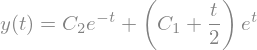

In [20]:
from sympy import dsolve, Function, latex, Eq, init_printing
# init_printing(use_latex=True, use_unicode=True)
init_printing()
t = symbols('t')
y = Function('y')
sol = dsolve(Eq(y(t).diff(t,t) - y(t), exp(t)), y(t))
sol
# print(latex(sol))


La commande [init_printing](https://docs.sympy.org/latest/tutorials/intro-tutorial/printing.html) permet d'avoir un rendu enrichi du résultat, comme ici, directement en $\LaTeX$. Il existe aussi d'autre types de rendu intermédiaires (et moins long à afficher), mais ils demandent un peu plus de temps à afficher et attention, ces options peuvent être exclusives les unes des autres (faire des essais pour vérifier que cela fonctionne). La commande [latex](https://docs.sympy.org/latest/modules/printing.html?highlight=latex#module-sympy.printing.latex) quant à elle renvoie du code $\LaTeX$ à intégrer dans un document écrit en $\LaTeX$.

Il suffit de recopier le bloc ci-dessus dans un bloc $\LaTeX$ pour avoir une expression plus sympatique à lire.

$$y{\left(t \right)} = C_{2} e^{- t} + \left(C_{1} + \frac{t}{2}\right) e^{t}$$
